# Soumya Banerjee (CS22MTECH12011)
## Deep Learning : Assignment -1

## 1. Perceptron learning algorithm
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note that you have to create such a dataset with at least 1000 data points. Plot the dataset before and after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k) by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)

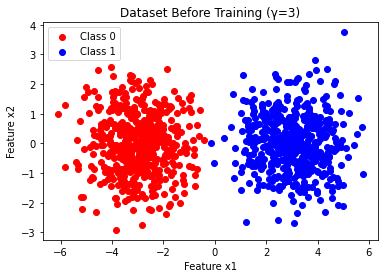

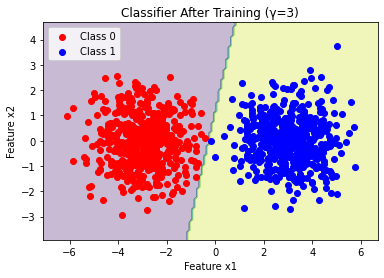

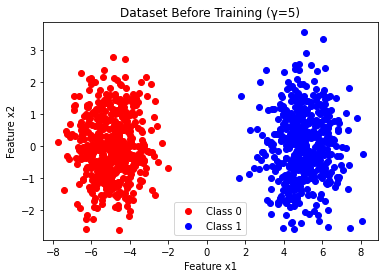

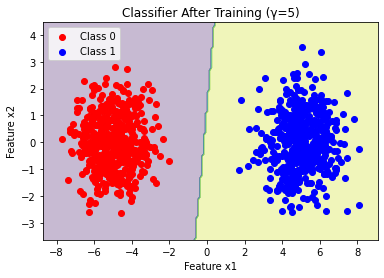

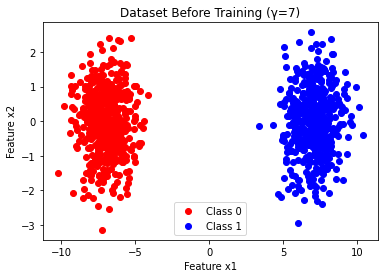

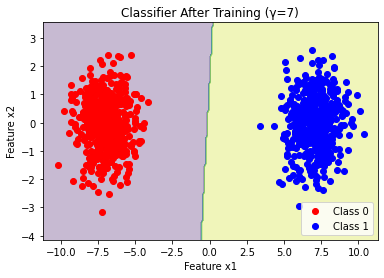

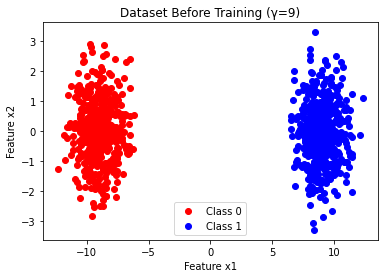

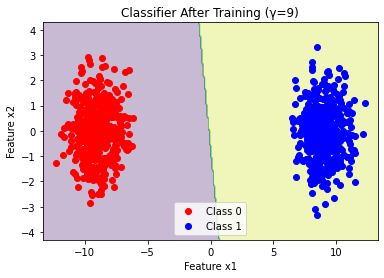

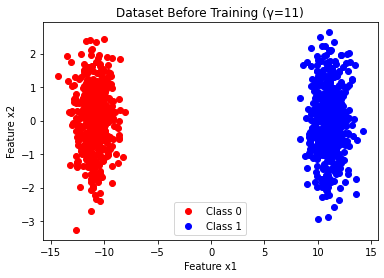

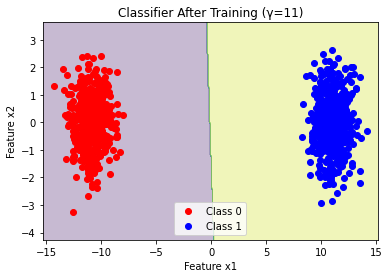

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a 2D linearly separable dataset
def generate_dataset(gamma, N=1000):
    mean_0 = [-gamma, 0]
    mean_1 = [gamma, 0]
    cov = [[1, 0], [0, 1]]
    class_0 = np.random.multivariate_normal(mean_0, cov, N//2)
    class_1 = np.random.multivariate_normal(mean_1, cov, N//2)
    return np.concatenate([class_0, class_1]), np.concatenate([np.zeros(N//2), np.ones(N//2)])


# Plotting the dataset before training
def plot_dataset(X, y, title):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0',c='red')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1',c='blue')
    plt.title(title)
    plt.xlabel('Feature x1')
    plt.ylabel('Feature x2')
    plt.legend()
    plt.show()

# Perceptron learning algorithm
def perceptron_learning(X, y, max_iter=1000, learning_rate=0.05):
    w = np.zeros(X.shape[1])
    b = 0
    count = 0
    converge = False
    while (not converge) and (count < max_iter):
        converge = True
        for i in range(len(y)):
            if (y[i] * (np.dot(X[i], w) + b)) <= 0:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
                converge = False
        count += 1
    return w, b, count

# Plotting the classifier after training
def plot_classifier(X, y, w, b, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = np.where(Z > 0, 1, 0)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plot_dataset(X, y, title)

# Changing the level of separability in the dataset
gamma_values = [3, 5, 7, 9, 11]
k_values = []
for gammas in gamma_values:
    X, y = generate_dataset(gammas)
    plot_dataset(X, y, 'Dataset Before Training (γ={})'.format(gammas))
    w, b, k = perceptron_learning(X, y)
    plot_classifier(X, y, w, b, 'Classifier After Training (γ={})'.format(gammas))
    k_values.append(k)


Analysis and Understanding : As the level of separability (γ) increases, the average number of iterations required for perfect classification (k) decreases. This is because a larger margin (larger γ) makes the dataset more linearly separable, which allows the perceptron to converge to a solution more quickly.
If the data is not linearly separable, the Perceptron algorithm will not converge, and the number of iterations will reach the maximum specified in the algorithm.

## 2. Gradient descent for training a linear classifier
[10 = loss formulation 4 + gradient computation 3 + update equation 3]
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset) using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our classroom discussion on the desirable properties of a loss function. You may implement the analytical way of finding gradient for it. You may implement the basic version of gradient descent 
update equation. Plot the dataset before and after training (with the classifier).

X.shape= (1000, 2)
Y.shape= (1000,)


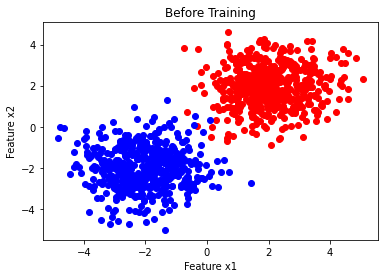

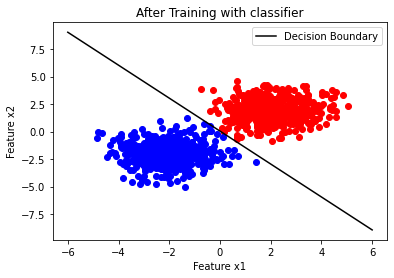

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a linearly separable 2D dataset
num_samples = 500

# Class 0 data
x0 = np.random.randn(num_samples, 2) + 2
y0 = np.zeros(num_samples)

# Class 1 data
x1 = np.random.randn(num_samples, 2) - 2
y1 = np.ones(num_samples)

# Concatenate data
X = np.concatenate([x0, x1], axis=0)
y = np.concatenate([y0, y1], axis=0)

#print("X=",X)
print("X.shape=",X.shape)
print("Y.shape=",y.shape)

# Plot the dataset before training
plt.scatter(X[:num_samples, 0], X[:num_samples, 1], c='red')
plt.scatter(X[num_samples:, 0], X[num_samples:, 1], c='blue')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title("Before Training")
plt.show()

# Define the model
class LinearClassifier:
    def __init__(self):
        self.W = np.random.randn(2)
        self.b = np.random.randn(1)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        return self.sigmoid(X @ self.W + self.b)
    
    def BCE_loss(self, y_hat, y):
        return -(y * np.log(y_hat) + (1-y) * np.log(1-y_hat)).mean()
    
    def grad_W(self, X, y_hat, y):
        return (X.T @ (y_hat - y)) / X.shape[0]
    
    def grad_b(self, y_hat, y):
        return (y_hat - y).mean()

# Initializing the model
model = LinearClassifier()

# Training loop
for epoch in range(1000):
    # Forward pass
    y_hat = model.forward(X)
    loss = model.BCE_loss(y_hat, y)
    
    # Backward pass
    dW = model.grad_W(X, y_hat, y)
    db = model.grad_b(y_hat, y)
    
    # Update parameters
    model.W -= 0.1 * dW
    model.b -= 0.1 * db

# Plot the dataset after training
y_pred = model.forward(X).round()
X_class0 = X[y_pred==0]
X_class1 = X[y_pred==1]

# plt.scatter(X_class0[:, 0], X_class0[:, 1], c='r')
# plt.scatter(X_class1[:, 0], X_class1[:, 1], c='b')
# plt.title("After Training")
# plt.show()

# Plot the decision boundary
w = model.W
b = model.b

x = np.linspace(-6, 6, 2)
y = -(w[0] * x + b) / w[1]

plt.scatter(X_class0[:, 0], X_class0[:, 1], c='red')
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue')
plt.plot(x, y, c='k', label='Decision Boundary')
plt.title("After Training with classifier")
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()



## 3. MLP with a single hidden layer
[20 = dataset creation 3 + MLP definition 3 + backprop 10 + elegance/recursion 4]
Consider a binary classification dataset that is not linearly separable in 2D (e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP) with a single hidden layer for classifying the same. You may use the loss function used in problem 2. You have to implement the gradient descent (i.e. backpropagation) algorithm yourself.

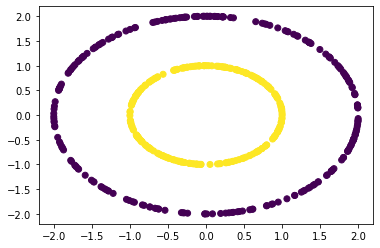

Epoch: 100, Loss: 0.6928286552429199
Epoch: 200, Loss: 0.6916117668151855
Epoch: 300, Loss: 0.6911493539810181
Epoch: 400, Loss: 0.6908405423164368
Epoch: 500, Loss: 0.6905738711357117
Epoch: 600, Loss: 0.690327525138855
Epoch: 700, Loss: 0.690096378326416
Epoch: 800, Loss: 0.6898787021636963
Epoch: 900, Loss: 0.6896730661392212
Epoch: 1000, Loss: 0.68947833776474
Accuracy: 54.00%


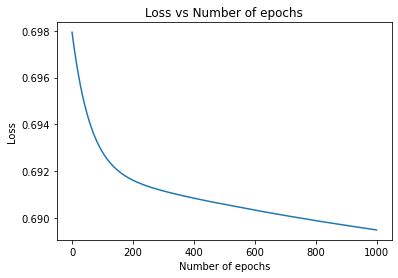

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset for binary classification
np.random.seed(0)
n_samples = 500
X = np.zeros((n_samples, 2))
y = np.zeros(n_samples)

# Class 1
angle = np.random.uniform(0, 2 * np.pi, n_samples // 2)
X[:n_samples // 2, 0] = np.cos(angle)
X[:n_samples // 2, 1] = np.sin(angle)
y[:n_samples // 2] = 1

# Class 2
angle = np.random.uniform(0, 2 * np.pi, n_samples // 2)
X[n_samples // 2:, 0] = 2 * np.cos(angle)
X[n_samples // 2:, 1] = 2 * np.sin(angle)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Convert data to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# MLP with a single hidden layer
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Initialize MLP
input_size = 2
hidden_size = 8
output_size = 1
model = MLP(input_size, hidden_size, output_size)

# BCE loss function
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
n_epochs = 1000
loss_history = []
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y.unsqueeze(1))
    loss_history.append(loss.item())

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

# Evaluate the model
y_pred = model(X)
y_pred = (y_pred > 0.5).float()
acc = (y_pred.squeeze() == y).float().mean()
print(f"Accuracy: {acc.item() * 100:.2f}%")



plt.plot(range(n_epochs), loss_history)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Loss vs Number of epochs')
plt.show()
